Output: airport_cities.csv, flight_times_extended.csv
To create: dataset with cities, that are not matched between airport_cities and train_cities

# Comparing train and plane travel times

Import of libraries/flight data

In [26]:
# # TODO: delete this cell
# import os
# # set working directory
# os.chdir('/Users/emilejohnston/DataspellProjects/DOPP_group18')
# # show current working directory
# os.getcwd()

## Processing of flight data (should be changed to avoid strings of sets)

In [2]:
import pandas as pd

/var/folders/x2/jj0kgq010j128mdwvs89btf00000gp/T/ipykernel_40187/2035458946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [28]:
flights = pd.read_csv('../datasets/flight_times.csv') # TODO: the way this file is made is not good, the routes are strings of sets, need to change 
flights

,Unnamed: 0,route,time
0,0,"{'AAL', 'AMS'}",85.0
1,1,"{'AAQ', 'LED'}",170.0
2,2,"{'AMS', 'ABZ'}",85.0
3,3,"{'ABZ', 'LGW'}",95.0
4,4,"{'ACE', 'AGP'}",130.0
...,...,...,...
1464,1464,"{'ZRH', 'OTP'}",150.0
1465,1465,"{'ZRH', 'PRN'}",127.5
1466,1466,"{'ZRH', 'RVN'}",205.0
1467,1467,"{'ZRH', 'STR'}",45.0


In [29]:
flights.drop(flights.columns[0], axis=1, inplace=True)
flights

,route,time
0,"{'AAL', 'AMS'}",85.0
1,"{'AAQ', 'LED'}",170.0
2,"{'AMS', 'ABZ'}",85.0
3,"{'ABZ', 'LGW'}",95.0
4,"{'ACE', 'AGP'}",130.0
...,...,...
1464,"{'ZRH', 'OTP'}",150.0
1465,"{'ZRH', 'PRN'}",127.5
1466,"{'ZRH', 'RVN'}",205.0
1467,"{'ZRH', 'STR'}",45.0


In [30]:
flights['departure airport'] = flights['route'].apply(lambda x: x.split(',')[0].strip("{'"))
flights['arrival airport'] = flights['route'].apply(lambda x: x.split(',')[1].strip(" }'"))
flights

,route,time,departure airport,arrival airport
0,"{'AAL', 'AMS'}",85.0,AAL,AMS
1,"{'AAQ', 'LED'}",170.0,AAQ,LED
2,"{'AMS', 'ABZ'}",85.0,AMS,ABZ
3,"{'ABZ', 'LGW'}",95.0,ABZ,LGW
4,"{'ACE', 'AGP'}",130.0,ACE,AGP
...,...,...,...,...
1464,"{'ZRH', 'OTP'}",150.0,ZRH,OTP
1465,"{'ZRH', 'PRN'}",127.5,ZRH,PRN
1466,"{'ZRH', 'RVN'}",205.0,ZRH,RVN
1467,"{'ZRH', 'STR'}",45.0,ZRH,STR


## Import airport codes

In [31]:
# new dataset, which is the same but without the encoding error:
airports = pd.read_csv('../datasets/fixed-airports-codes.csv')
airports

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total RF Heliport,40.070985,-74.933689,11.0,NaN,US,US-PA,Bensalem,no,K00A,NaN,00A,https://www.penndot.pa.gov/TravelInPA/airports...,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,506791,00AN,small_airport,Katmai Lodge Airport,59.093287,-156.456699,80.0,NaN,US,US-AK,King Salmon,no,00AN,NaN,00AN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78148,46378,ZZ-0001,heliport,Sealand Helipad,51.894444,1.482500,40.0,EU,GB,GB-ENG,Sealand,no,NaN,NaN,NaN,http://www.sealandgov.org/,https://en.wikipedia.org/wiki/Principality_of_...,Roughs Tower Helipad
78149,307326,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,AF,TF,TF-U-A,Grande Glorieuse,no,NaN,NaN,NaN,NaN,NaN,NaN
78150,346788,ZZ-0003,small_airport,Fainting Goat Airport,32.110587,-97.356312,690.0,NaN,US,US-TX,Blum,no,87TX,NaN,87TX,NaN,NaN,NaN
78151,342102,ZZZW,closed,Scandium City Heliport,69.355287,-138.939310,4.0,NaN,CA,CA-YT,(Old) Scandium City,no,NaN,NaN,NaN,NaN,NaN,"ZZZW, ZZZW, ZYW, YK96"


In [32]:
# airports = pd.read_csv('./datasets/airport-codes.csv')
# airports

In [33]:
cities = airports[['iata_code', 'municipality']]
cities

,iata_code,municipality
0,NaN,Bensalem
1,NaN,Leoti
2,NaN,Anchor Point
3,NaN,Harvest
4,NaN,King Salmon
...,...,...
78148,NaN,Sealand
78149,NaN,Grande Glorieuse
78150,NaN,Blum
78151,NaN,(Old) Scandium City


## Merging flights with airport names

In [34]:
# add departure city names
flights = pd.merge(flights, cities, left_on='departure airport', right_on='iata_code', how='left')
# remove the redundant column
flights.drop('iata_code', axis=1, inplace=True)
# rename the column
flights.rename(columns={'municipality': 'departure city'}, inplace=True)
# add arrival city names
flights = pd.merge(flights, cities, left_on='arrival airport', right_on='iata_code', how='left')
# remove the redundant column
flights.drop('iata_code', axis=1, inplace=True)
# rename the column
flights.rename(columns={'municipality': 'arrival city'}, inplace=True)
flights

,route,time,departure airport,arrival airport,departure city,arrival city
0,"{'AAL', 'AMS'}",85.0,AAL,AMS,Aalborg,Amsterdam
1,"{'AAQ', 'LED'}",170.0,AAQ,LED,Krasnyi Kurgan,St. Petersburg
2,"{'AMS', 'ABZ'}",85.0,AMS,ABZ,Amsterdam,Aberdeen
3,"{'ABZ', 'LGW'}",95.0,ABZ,LGW,Aberdeen,"Gatwick, Surrey"
4,"{'ACE', 'AGP'}",130.0,ACE,AGP,San Bartolomé,Málaga
...,...,...,...,...,...,...
1464,"{'ZRH', 'OTP'}",150.0,ZRH,OTP,Zurich,Otopeni
1465,"{'ZRH', 'PRN'}",127.5,ZRH,PRN,Zurich,Prishtina
1466,"{'ZRH', 'RVN'}",205.0,ZRH,RVN,Zurich,Rovaniemi
1467,"{'ZRH', 'STR'}",45.0,ZRH,STR,Zurich,Stuttgart


Does the 'municipality' variable refer to the actual administrative division that the airport is located in, or the big city it's next to? Let's check.

In [35]:
flights[flights['departure city'].str.contains('London')]

,route,time,departure airport,arrival airport,departure city,arrival city
698,"{'LHR', 'ABZ'}",95.0,LHR,ABZ,London,Aberdeen
699,"{'LHR', 'AGP'}",185.0,LHR,AGP,London,Málaga
700,"{'LHR', 'AMS'}",85.0,LHR,AMS,London,Amsterdam
701,"{'LHR', 'ARN'}",160.0,LHR,ARN,London,Stockholm
702,"{'LHR', 'ATH'}",245.0,LHR,ATH,London,Spata-Artemida
...,...,...,...,...,...,...
1201,"{'STN', 'VRN'}",122.5,STN,VRN,London,Caselle (VR)
1202,"{'STN', 'WMI'}",135.0,STN,WMI,London,Warsaw
1203,"{'STN', 'WRO'}",125.0,STN,WRO,London,Wrocław
1204,"{'STN', 'ZAG'}",135.0,STN,ZAG,London,Zagreb


## Save extended flight routes (TODO: delete)

In [36]:
flights.to_csv("../datasets/flight_times_extended.csv")

Save airport cities we have so far

## Retrieve airport cities

In [37]:
airport_cites = set(flights["departure city"]) | set(flights["arrival city"])
airport_cites = pd.DataFrame(airport_cites)
airport_cites.to_csv("../datasets/airport_cities.csv",index=False, header=False)
airport_cites[0]

0                 Saint-Louis
1                   Santander
2                       Penza
3                Venezia (VE)
4                     Vilnius
                ...          
299                     Horta
300    Calvi/Sainte-Catherine
301                   Bristol
302      Kuopio / Siilinjärvi
303                   Billund
Name: 0, Length: 304, dtype: object

## Intersection of cities from flight and train data 

Now we need to check that the train and plane datasets are using the same city names. We'll do this by checking that the city names in the plane dataset are a subset of the city names in the train dataset.

Import of train routes preprocessed in "Rail transport performance.ipnyb"

In [38]:
trains  = pd.read_csv('../datasets/train_routes.csv')
train_cities = pd.read_csv("../datasets/train_cities.csv")
trains = trains.iloc[:,1:]
train_cities

,city
0,St. Gallen
1,Cremona
2,Gütersloh
3,Basel
4,Salzburg
...,...
656,Bruxelles
657,Parla
658,Iserlohn
659,Harrogate


In [39]:
airport_cities_set = set(airport_cites[0])
airport_cities_set

{'Aalborg',
 'Aarhus',
 'Aberdeen',
 'Ajaccio/Napoléon Bonaparte',
 'Alexandroupolis',
 'Alghero',
 'Alicante',
 'Almería',
 'Amsterdam',
 'Ancona',
 'Andenes',
 'Archangelsk',
 'Astrakhan',
 'Bacău',
 'Balice',
 'Banja Luka',
 'Barcelona',
 'Bari',
 'Bastia/Poretta',
 'Belfast',
 'Belgrade',
 'Bergen',
 'Beslan',
 'Bilbao',
 'Billund',
 'Birmingham',
 'Bodø',
 'Bologna',
 'Bolzano (BZ)',
 'Bordeaux/Mérignac',
 'Bournemouth',
 'Bragança',
 'Bratislava',
 'Bremen',
 'Brindisi',
 'Bristol',
 'Brønnøy',
 'Budapest',
 'Bugulma',
 'Burgas',
 'Bydgoszcz',
 'Béziers/Vias',
 'Cagliari',
 'Calvi/Sainte-Catherine',
 'Cardiff',
 'Cascais',
 'Caselle (VR)',
 'Caselle Torinese (TO)',
 'Castellón de la Plana',
 'Castletown',
 'Catania',
 'Charleroi',
 'Cheboksary',
 'Chelyabinsk',
 'Cherepovets',
 'Chios Island',
 'Chita',
 'Chişinău',
 'Cluj-Napoca',
 'Copenhagen',
 'Corvera',
 'Craiova',
 'Crete Island',
 'Crotone',
 'Culleredo',
 'Debrecen',
 'Dortmund',
 'Dresden',
 'Dubrave Gornje',
 'Düsseldor

In [40]:
train_cities_set = set(train_cities["city"])
train_cities_set

{"'s-Hertogenbosch",
 'A Coruña',
 'Aachen',
 'Aberdeen',
 'Acerra',
 'Acireale',
 'Aix-en-Provence',
 'Albacete',
 'Alcalá de Henares',
 'Aldwick',
 'Alessandria',
 'Alicante/Alacant',
 'Alkmaar',
 'Almada',
 'Almelo',
 'Almere',
 'Alphen aan den Rijn',
 'Amersfoort',
 'Amiens',
 'Amsterdam',
 'Ancona',
 'Angers',
 'Annecy',
 'Antibes',
 'Antwerpen',
 'Anzio',
 'Apeldoorn',
 'Arad',
 'Arcozelo',
 'Arezzo',
 'Arnhem',
 'Arras',
 'Ashford',
 'Assen',
 'Asti',
 'Augsburg',
 'Avellino',
 'Avignon',
 'Aylesbury',
 'Ayr',
 'Bacău',
 'Bad Soden am Taunus',
 'Badajoz',
 'Bagheria',
 'Baia Mare',
 'Bamberg',
 'Bangor',
 'Banská Bystrica',
 'Barcelona',
 'Bari',
 'Barletta',
 'Barnsley',
 'Barreiro',
 'Basel',
 'Basildon',
 'Basingstoke and Deane',
 'Bath',
 'Battipaglia',
 'Bayonne',
 'Bayreuth',
 'Bedford',
 'Belfast',
 'Belfort',
 'Benrath',
 'Bergamo',
 'Bergen op Zoom',
 'Berlin',
 'Bern',
 'Besançon',
 'Beverwijk/Heemskerk',
 'Białystok',
 'Biel/Bienne',
 'Bielefeld',
 'Bielsko-Biała',
 '

Which cities are in the airport dataset but not the train dataset?

In [41]:
len(airport_cities_set - train_cities_set)

232

Names we have in both

In [42]:
airport_cities_set & train_cities_set

{'Aberdeen',
 'Amsterdam',
 'Ancona',
 'Bacău',
 'Barcelona',
 'Bari',
 'Belfast',
 'Birmingham',
 'Bologna',
 'Bournemouth',
 'Bratislava',
 'Bremen',
 'Brindisi',
 'Bristol',
 'Budapest',
 'Bydgoszcz',
 'Cardiff',
 'Catania',
 'Charleroi',
 'Dresden',
 'Düsseldorf',
 'Edinburgh',
 'Eindhoven',
 'Firenze',
 'Frankfurt am Main',
 'Gdańsk',
 'Girona',
 'Hamburg',
 'Hannover',
 'Helsinki',
 'Innsbruck',
 'Jerez de la Frontera',
 'Leeds',
 'Liverpool',
 'London',
 'Lublin',
 'Luxembourg',
 'Lyon',
 'Maastricht',
 'Madrid',
 'Malmö',
 'Marseille',
 'Málaga',
 'Nantes',
 'Napoli',
 'Nice',
 'Olsztyn',
 'Oslo',
 'Palermo',
 'Paris',
 'Perugia',
 'Pescara',
 'Pisa',
 'Porto',
 'Poznań',
 'Radom',
 'Rotterdam',
 'Salzburg',
 'Santander',
 'Santiago de Compostela',
 'Sevilla',
 'Southampton',
 'Stockholm',
 'Stuttgart',
 'Thessaloniki',
 'Timişoara',
 'Valencia',
 'Varna',
 'Vigo',
 'Wrocław',
 'Zaragoza',
 'Łódź'}

Names in Airports, not in train_stations

In [43]:
train_cities_set - airport_cities_set

{"'s-Hertogenbosch",
 'A Coruña',
 'Aachen',
 'Acerra',
 'Acireale',
 'Aix-en-Provence',
 'Albacete',
 'Alcalá de Henares',
 'Aldwick',
 'Alessandria',
 'Alicante/Alacant',
 'Alkmaar',
 'Almada',
 'Almelo',
 'Almere',
 'Alphen aan den Rijn',
 'Amersfoort',
 'Amiens',
 'Angers',
 'Annecy',
 'Antibes',
 'Antwerpen',
 'Anzio',
 'Apeldoorn',
 'Arad',
 'Arcozelo',
 'Arezzo',
 'Arnhem',
 'Arras',
 'Ashford',
 'Assen',
 'Asti',
 'Augsburg',
 'Avellino',
 'Avignon',
 'Aylesbury',
 'Ayr',
 'Bad Soden am Taunus',
 'Badajoz',
 'Bagheria',
 'Baia Mare',
 'Bamberg',
 'Bangor',
 'Banská Bystrica',
 'Barletta',
 'Barnsley',
 'Barreiro',
 'Basel',
 'Basildon',
 'Basingstoke and Deane',
 'Bath',
 'Battipaglia',
 'Bayonne',
 'Bayreuth',
 'Bedford',
 'Belfort',
 'Benrath',
 'Bergamo',
 'Bergen op Zoom',
 'Berlin',
 'Bern',
 'Besançon',
 'Beverwijk/Heemskerk',
 'Białystok',
 'Biel/Bienne',
 'Bielefeld',
 'Bielsko-Biała',
 'Bisceglie',
 'Blackburn with Darwen',
 'Blackpool',
 'Blanchardstown',
 'Blantyre',

In [44]:
airport_cities_set - train_cities_set

{'Aalborg',
 'Aarhus',
 'Ajaccio/Napoléon Bonaparte',
 'Alexandroupolis',
 'Alghero',
 'Alicante',
 'Almería',
 'Andenes',
 'Archangelsk',
 'Astrakhan',
 'Balice',
 'Banja Luka',
 'Bastia/Poretta',
 'Belgrade',
 'Bergen',
 'Beslan',
 'Bilbao',
 'Billund',
 'Bodø',
 'Bolzano (BZ)',
 'Bordeaux/Mérignac',
 'Bragança',
 'Brønnøy',
 'Bugulma',
 'Burgas',
 'Béziers/Vias',
 'Cagliari',
 'Calvi/Sainte-Catherine',
 'Cascais',
 'Caselle (VR)',
 'Caselle Torinese (TO)',
 'Castellón de la Plana',
 'Castletown',
 'Cheboksary',
 'Chelyabinsk',
 'Cherepovets',
 'Chios Island',
 'Chita',
 'Chişinău',
 'Cluj-Napoca',
 'Copenhagen',
 'Corvera',
 'Craiova',
 'Crete Island',
 'Crotone',
 'Culleredo',
 'Debrecen',
 'Dortmund',
 'Dubrave Gornje',
 'El Matorral',
 'Evenes',
 'Faro',
 'Feldkirchen bei Graz',
 'Ferno (VA)',
 'Figari Sud-Corse',
 'Florø',
 'Frankfurt am Main (Lautzenhausen)',
 'Funchal',
 'Gatwick, Surrey',
 'Gelendzhik',
 'Geneva',
 'Genova (GE)',
 'Gibraltar',
 'Goleniow',
 'Gothenburg',
 'Gr

## Pipeline for matching routes
input: a list of cities
output: a dataset with routes, train travel times and plane travel times

### Intersecting cities

In [45]:
intersecting_cities = airport_cities_set & train_cities_set # TODO: change this variable to integrate more cities
print(f'Number of cities we are working with: {len(intersecting_cities)}')
intersecting_cities

Number of cities we are working with: 72


{'Aberdeen',
 'Amsterdam',
 'Ancona',
 'Bacău',
 'Barcelona',
 'Bari',
 'Belfast',
 'Birmingham',
 'Bologna',
 'Bournemouth',
 'Bratislava',
 'Bremen',
 'Brindisi',
 'Bristol',
 'Budapest',
 'Bydgoszcz',
 'Cardiff',
 'Catania',
 'Charleroi',
 'Dresden',
 'Düsseldorf',
 'Edinburgh',
 'Eindhoven',
 'Firenze',
 'Frankfurt am Main',
 'Gdańsk',
 'Girona',
 'Hamburg',
 'Hannover',
 'Helsinki',
 'Innsbruck',
 'Jerez de la Frontera',
 'Leeds',
 'Liverpool',
 'London',
 'Lublin',
 'Luxembourg',
 'Lyon',
 'Maastricht',
 'Madrid',
 'Malmö',
 'Marseille',
 'Málaga',
 'Nantes',
 'Napoli',
 'Nice',
 'Olsztyn',
 'Oslo',
 'Palermo',
 'Paris',
 'Perugia',
 'Pescara',
 'Pisa',
 'Porto',
 'Poznań',
 'Radom',
 'Rotterdam',
 'Salzburg',
 'Santander',
 'Santiago de Compostela',
 'Sevilla',
 'Southampton',
 'Stockholm',
 'Stuttgart',
 'Thessaloniki',
 'Timişoara',
 'Valencia',
 'Varna',
 'Vigo',
 'Wrocław',
 'Zaragoza',
 'Łódź'}

### Train routes

In [48]:
train_routes = pd.read_csv('../datasets/train_routes.csv') # TODO: change how the dataframe is obtained, it should be directly in the notebook and not from a csv file
train_routes

,index,city_1,city_2,time_avg[h],time_opti[h],time_opti[min],time_avg[min]
0,0,Paris,Bruxelles,1.71,1.44,86.4,102.6
1,1,Paris,Lille,1.29,1.00,60.0,77.4
2,2,Paris,Rouen,1.67,1.24,74.4,100.2
3,3,Paris,Cergy-Pontoise,0.17,0.07,4.2,10.2
4,4,Paris,Tours,1.54,0.86,51.6,92.4
...,...,...,...,...,...,...,...
3429,6575,Trani,Manfredonia,3.88,1.13,67.8,232.8
3430,6582,Kettering,Corby,0.83,0.14,8.4,49.8
3431,6584,San Severo,Bisceglie,2.69,1.10,66.0,161.4
3432,6585,San Severo,Manfredonia,4.26,0.85,51.0,255.6


In [49]:
reduced_train_routes = train_routes[(train_routes['city_1'].isin(intersecting_cities)) & (train_routes['city_2'].isin(intersecting_cities))]
reduced_train_routes

,index,city_1,city_2,time_avg[h],time_opti[h],time_opti[min],time_avg[min]
22,22,London,Birmingham,1.52,1.11,66.6,91.2
25,25,London,Bristol,1.82,1.48,88.8,109.2
29,29,London,Southampton,1.45,1.14,68.4,87.0
87,87,Madrid,Zaragoza,1.99,1.43,85.8,119.4
169,187,Barcelona,Zaragoza,2.05,1.47,88.2,123.0
175,194,Barcelona,Girona,1.21,0.63,37.8,72.6
186,208,Birmingham,Liverpool,1.44,1.10,66.0,86.4
188,210,Birmingham,Bristol,1.66,1.38,82.8,99.6
287,340,Hamburg,Hannover,1.57,1.27,76.2,94.2
288,341,Hamburg,Bremen,1.22,0.91,54.6,73.2


In [50]:
reduced_train_routes['trip'] = reduced_train_routes.apply(lambda row: {row['city_1'], row['city_2']}, axis=1)
reduced_train_routes

C:\Users\ankys\AppData\Local\Temp\ipykernel_13864\2296663045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_train_routes['trip'] = reduced_train_routes.apply(lambda row: {row['city_1'], row['city_2']}, axis=1)


,index,city_1,city_2,time_avg[h],time_opti[h],time_opti[min],time_avg[min],trip
22,22,London,Birmingham,1.52,1.11,66.6,91.2,"{Birmingham, London}"
25,25,London,Bristol,1.82,1.48,88.8,109.2,"{London, Bristol}"
29,29,London,Southampton,1.45,1.14,68.4,87.0,"{London, Southampton}"
87,87,Madrid,Zaragoza,1.99,1.43,85.8,119.4,"{Zaragoza, Madrid}"
169,187,Barcelona,Zaragoza,2.05,1.47,88.2,123.0,"{Zaragoza, Barcelona}"
175,194,Barcelona,Girona,1.21,0.63,37.8,72.6,"{Barcelona, Girona}"
186,208,Birmingham,Liverpool,1.44,1.10,66.0,86.4,"{Birmingham, Liverpool}"
188,210,Birmingham,Bristol,1.66,1.38,82.8,99.6,"{Birmingham, Bristol}"
287,340,Hamburg,Hannover,1.57,1.27,76.2,94.2,"{Hannover, Hamburg}"
288,341,Hamburg,Bremen,1.22,0.91,54.6,73.2,"{Hamburg, Bremen}"


To be able to perform an inner join, the sets need to be converted to tuples, which are immutable and hashable and therefore can be used as keys in a join with pandas.

In [51]:
reduced_train_routes['trip'] = reduced_train_routes['trip'].apply(lambda x: tuple(sorted(x)))

C:\Users\ankys\AppData\Local\Temp\ipykernel_13864\311558193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_train_routes['trip'] = reduced_train_routes['trip'].apply(lambda x: tuple(sorted(x)))


In [52]:
reduced_train_routes

,index,city_1,city_2,time_avg[h],time_opti[h],time_opti[min],time_avg[min],trip
22,22,London,Birmingham,1.52,1.11,66.6,91.2,"(Birmingham, London)"
25,25,London,Bristol,1.82,1.48,88.8,109.2,"(Bristol, London)"
29,29,London,Southampton,1.45,1.14,68.4,87.0,"(London, Southampton)"
87,87,Madrid,Zaragoza,1.99,1.43,85.8,119.4,"(Madrid, Zaragoza)"
169,187,Barcelona,Zaragoza,2.05,1.47,88.2,123.0,"(Barcelona, Zaragoza)"
175,194,Barcelona,Girona,1.21,0.63,37.8,72.6,"(Barcelona, Girona)"
186,208,Birmingham,Liverpool,1.44,1.10,66.0,86.4,"(Birmingham, Liverpool)"
188,210,Birmingham,Bristol,1.66,1.38,82.8,99.6,"(Birmingham, Bristol)"
287,340,Hamburg,Hannover,1.57,1.27,76.2,94.2,"(Hamburg, Hannover)"
288,341,Hamburg,Bremen,1.22,0.91,54.6,73.2,"(Bremen, Hamburg)"


### Flights

In [53]:
# TODO: this dataframe contains strings of sets, it should not be the case in the final notebook
reduced_flights = flights[(flights['departure city'].isin(intersecting_cities)) & (flights['arrival city'].isin(intersecting_cities))]
reduced_flights

,route,time,departure airport,arrival airport,departure city,arrival city
2,"{'AMS', 'ABZ'}",85.0,AMS,ABZ,Amsterdam,Aberdeen
34,"{'BCN', 'AGP'}",97.5,BCN,AGP,Barcelona,Málaga
37,"{'HAM', 'AGP'}",205.0,HAM,AGP,Hamburg,Málaga
39,"{'MAD', 'AGP'}",80.0,MAD,AGP,Madrid,Málaga
62,"{'ABZ', 'AMS'}",95.0,ABZ,AMS,Aberdeen,Amsterdam
...,...,...,...,...,...,...
1434,"{'WRO', 'AGP'}",220.0,WRO,AGP,Wrocław,Málaga
1435,"{'WRO', 'BHX'}",125.0,WRO,BHX,Wrocław,Birmingham
1437,"{'WRO', 'VLC'}",187.5,WRO,VLC,Wrocław,Valencia
1438,"{'XRY', 'BCN'}",105.0,XRY,BCN,Jerez de la Frontera,Barcelona


Looking for a particular city

In [54]:
reduced_flights[reduced_flights['trip'].str.contains('Eindhoven')]

KeyError: 'trip'

In [55]:
reduced_flights['trip'] = reduced_flights.apply(lambda row: {row['departure city'], row['arrival city']}, axis=1)
reduced_flights.drop(columns=['route', 'departure airport', 'arrival airport', 'departure city', 'arrival city'], inplace=True)
reduced_flights

C:\Users\ankys\AppData\Local\Temp\ipykernel_13864\2316806840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_flights['trip'] = reduced_flights.apply(lambda row: {row['departure city'], row['arrival city']}, axis=1)
C:\Users\ankys\AppData\Local\Temp\ipykernel_13864\2316806840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_flights.drop(columns=['route', 'departure airport', 'arrival airport', 'departure city', 'arrival city'], inplace=True)


,time,trip
2,85.0,"{Aberdeen, Amsterdam}"
34,97.5,"{Málaga, Barcelona}"
37,205.0,"{Málaga, Hamburg}"
39,80.0,"{Málaga, Madrid}"
62,95.0,"{Aberdeen, Amsterdam}"
...,...,...
1434,220.0,"{Málaga, Wrocław}"
1435,125.0,"{Birmingham, Wrocław}"
1437,187.5,"{Valencia, Wrocław}"
1438,105.0,"{Barcelona, Jerez de la Frontera}"


To be able to perform an inner join, the sets need to be converted to tuples, which are immutable and hashable and therefore can be used as keys in a join with pandas.

In [56]:
reduced_flights['trip'] = reduced_flights['trip'].apply(lambda x: tuple(sorted(x)))

C:\Users\ankys\AppData\Local\Temp\ipykernel_13864\405738195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_flights['trip'] = reduced_flights['trip'].apply(lambda x: tuple(sorted(x)))


### Final result

In [57]:
flights_and_trains = pd.merge(reduced_train_routes, reduced_flights, on='trip', how='inner')
flights_and_trains

,index,city_1,city_2,time_avg[h],time_opti[h],time_opti[min],time_avg[min],trip,time
0,755,Frankfurt am Main,Stuttgart,1.69,1.29,77.4,101.4,"(Frankfurt am Main, Stuttgart)",50.0
1,756,Frankfurt am Main,Düsseldorf,1.91,1.42,85.2,114.6,"(Düsseldorf, Frankfurt am Main)",50.0
2,756,Frankfurt am Main,Düsseldorf,1.91,1.42,85.2,114.6,"(Düsseldorf, Frankfurt am Main)",50.0


## Trying geolocation

### Testing Basemap

In [58]:
#!pip install basemap

In [59]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

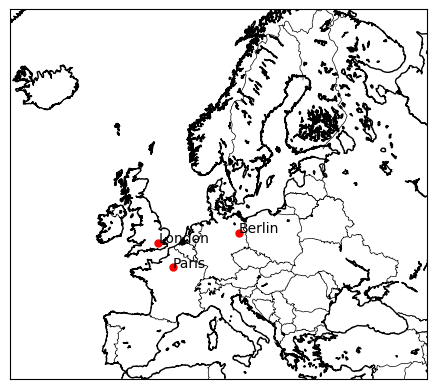

In [65]:
# Create a Basemap instance for a map of Europe
map = Basemap(projection='merc',
			  llcrnrlat=35, urcrnrlat=70, # Latitude limits (lower left, upper right)
			  llcrnrlon=-25, urcrnrlon=45, # Longitude limits
			  resolution='i')

# Draw coastlines and countries
map.drawcoastlines() # coastlines take up too much space
map.drawcountries()

# Define coordinates of Paris, Berlin, and London
cities = {
	"Paris": (48.8566, 2.3522),
	"Berlin": (52.5200, 13.4050),
	"London": (51.5074, -0.1278)
}

# Plot each city
for city, (lat, lon) in cities.items():
	x, y = map(lon, lat)
	map.plot(x, y, marker='o', color='Red', markersize=5)
	plt.text(x, y, city)

# Show the plot
plt.show()

### Airports

In [66]:
air_codes_set = set(flights["departure airport"]) | set(flights["arrival airport"])
print(f'Number of airports we are working with: {len(air_codes_set)}')

Number of airports we are working with: 313


In [67]:
our_airports = airports[airports['iata_code'].isin(air_codes_set)] # TODO: make sure airport_cities_set has original municipality names
our_airports

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
13969,4614,BKPR,medium_airport,Priština Adem Jashari International Airport,42.572800,21.035801,1789.0,EU,XK,XK-01,Prishtina,yes,BKPR,PRN,NaN,http://www.airportpristina.com/,https://en.wikipedia.org/wiki/Pristina_Interna...,"LYPR, Pristina, Slatina Air Base"
22121,2155,EBBR,large_airport,Brussels Airport,50.901402,4.484440,175.0,EU,BE,BE-BRU,Zaventem,yes,EBBR,BRU,NaN,http://www.brusselsairport.be/en/,https://en.wikipedia.org/wiki/Brussels_Airport,"Brussels National, Zaventem, EBMB"
22129,2157,EBCI,medium_airport,Brussels South Charleroi Airport,50.460982,4.457158,614.0,EU,BE,BE-WHT,Charleroi,yes,EBCI,CRL,NaN,http://www.charleroi-airport.com/doc.php?nd=o2...,https://en.wikipedia.org/wiki/Brussels_South_C...,Gosselies Airport
22177,2162,EBLG,medium_airport,Liège Airport,50.638574,5.443897,659.0,EU,BE,BE-WLG,Grâce-Hollogne,yes,EBLG,LGG,NaN,http://www.liegeairport.be/,https://en.wikipedia.org/wiki/Li%C3%A8ge_Airport,Bierset
22398,2210,EDDC,medium_airport,Dresden Airport,51.134123,13.767831,755.0,EU,DE,DE-SN,Dresden,yes,EDDC,DRS,NaN,http://www.dresden-airport.de/en/index.html,https://en.wikipedia.org/wiki/Dresden_Airport,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72929,26408,UWOO,medium_airport,Orenburg Central Airport,51.795799,55.456699,387.0,EU,RU,RU-ORE,Orenburg,yes,UWOO,REN,NaN,http://www.airoport.orenair.ru/,https://en.wikipedia.org/wiki/Orenburg_Tsentra...,"Orenburg Tsentralny Airport, Аэропорт Центральный"
72930,26409,UWOR,medium_airport,Orsk Airport,51.072498,58.595600,909.0,AS,RU,RU-ORE,Orsk,yes,UWOR,OSW,NaN,NaN,https://en.wikipedia.org/wiki/Orsk_Airport,NaN
72932,32155,UWPP,medium_airport,Penza Airport,53.110600,45.021099,614.0,EU,RU,RU-PNZ,Penza,yes,UWPP,PEZ,NaN,NaN,https://en.wikipedia.org/wiki/Penza_Airport,Penza South
72944,26411,UWUU,large_airport,Ufa International Airport,54.557499,55.874401,449.0,EU,RU,RU-BA,Ufa,yes,UWUU,UFA,NaN,http://www.airportufa.ru/en/,https://en.wikipedia.org/wiki/Ufa_Internationa...,Международный аэропорт Уфа


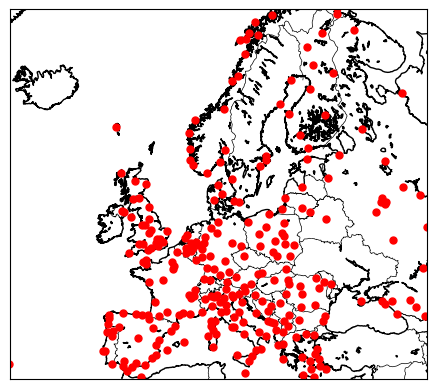

In [68]:
# Create a Basemap instance for a map of Europe
map = Basemap(projection='merc',
			  llcrnrlat=35, urcrnrlat=70,  # Latitude limits (lower left, upper right)
			  llcrnrlon=-25, urcrnrlon=45,  # Longitude limits
			  resolution='i')

# Draw coastlines and countries
map.drawcoastlines() # coastlines take up too much space
map.drawcountries()

# Plot each city
for index, row in our_airports.iterrows():
	x, y = map(row['longitude_deg'], row['latitude_deg'])
	map.plot(x, y, marker='o', color='Red', markersize=5)
	# plt.text(x, y, row['municipality']) # text would take up too much space

# Show the plot
plt.show()

### Cities

In [5]:
import os
def create_combined_dataframe(directory):
	dataframes = []

	# Iterate over all files in the directory
	for filename in os.listdir(directory):
		if filename.endswith('.csv'):
			filepath = os.path.join(directory, filename)
			df = pd.read_csv(filepath)
			dataframes.append(df)

	# Concatenate all df
	combined_df = pd.concat(dataframes, ignore_index=True)
	return combined_df

#
directory_path = '../datasets/Geolocation'  # Replace with your directory path
df_geo = create_combined_dataframe(directory_path)
df_geo

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Tirana,41.3289,19.8178,Albania,AL,Tiranë,primary,418495.0,418495.0
1,Vlorë,40.4667,19.4833,Albania,AL,Vlorë,admin,130827.0,130827.0
2,Kamëz,41.3833,19.7667,Albania,AL,Tiranë,NaN,126777.0,126777.0
3,Fier,40.7250,19.5572,Albania,AL,Fier,admin,120655.0,120655.0
4,Durrës,41.3111,19.4392,Albania,AL,Durrës,admin,113249.0,113249.0
...,...,...,...,...,...,...,...,...,...
7923,Lommedalen,59.9500,10.4667,Norway,NO,Viken,NaN,11200.0,11200.0
7924,Barbu,58.4664,8.7781,Norway,NO,Agder,NaN,6787.0,6787.0
7925,Tiller,63.3550,10.3790,Norway,NO,Trøndelag,NaN,3595.0,3595.0
7926,Kolbotn,59.8112,10.8000,Norway,NO,Viken,minor,NaN,NaN


In [6]:
df_geo['country'].value_counts()

country
United Kingdom    680
France            634
Romania           528
Slovakia          443
Finland           357
Ireland           345
Moldova           294
Italy             281
Slovenia          273
Spain             266
Bulgaria          256
Serbia            250
Russia            235
Netherlands       229
Greece            225
Hungary           218
Ukraine           216
Turkey            204
Switzerland       185
Austria           182
Denmark           172
Poland            172
Czechia           153
Belarus           136
Latvia            129
Lithuania         127
Germany           123
Sweden            119
Albania           101
Estonia            93
Kosovo             91
Macedonia          75
Portugal           54
Belgium            52
Norway             30
Name: count, dtype: int64

In [7]:
df_geo = df_geo[df_geo['population_proper'] > 100000] # to avoid problems with small cities
df_geo

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Tirana,41.3289,19.8178,Albania,AL,Tiranë,primary,418495.0,418495.0
1,Vlorë,40.4667,19.4833,Albania,AL,Vlorë,admin,130827.0,130827.0
2,Kamëz,41.3833,19.7667,Albania,AL,Tiranë,NaN,126777.0,126777.0
3,Fier,40.7250,19.5572,Albania,AL,Fier,admin,120655.0,120655.0
4,Durrës,41.3111,19.4392,Albania,AL,Durrës,admin,113249.0,113249.0
...,...,...,...,...,...,...,...,...,...
7900,Stavanger,58.9700,5.7314,Norway,NO,Rogaland,admin,237369.0,129300.0
7902,Trondheim,63.4297,10.3933,Norway,NO,Trøndelag,minor,194860.0,194860.0
7903,Sandvika,59.8833,10.5167,Norway,NO,Viken,minor,115543.0,115543.0
7904,Kristiansand,58.1472,7.9972,Norway,NO,Agder,minor,113737.0,113737.0


In [8]:
df_geo['country'].value_counts()

country
Russia            172
Turkey            159
Germany            79
Spain              62
United Kingdom     52
Ukraine            46
Italy              45
France             40
Poland             37
Netherlands        29
Portugal           24
Romania            18
Belarus            13
Sweden             12
Greece              9
Belgium             9
Finland             9
Hungary             8
Norway              7
Bulgaria            7
Austria             6
Switzerland         6
Albania             6
Serbia              5
Czechia             5
Denmark             4
Lithuania           4
Slovakia            3
Ireland             3
Moldova             2
Kosovo              2
Macedonia           2
Slovenia            1
Estonia             1
Latvia              1
Name: count, dtype: int64

### Matching with distance

In [10]:
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
gdf_airports = gpd.GeoDataFrame(df_airports, geometry=gpd.points_from_xy(df_airports.longitude, df_airports.latitude))
gdf_cities = gpd.GeoDataFrame(df_cities, geometry=gpd.points_from_xy(df_cities.longitude, df_cities.latitude))


In [ ]:
# TODO: make a function that matches each airport with the closest (big) city based on coordinates

## Further steps